In [1]:
# We're going to be creating a real estate price prediction model based on a dataset of California Housing Prices taken from the 1990 census. It groups homes into blocks based on location and has key information such as coordinates for location, age, number of total rooms and bedrooms, population, total households, median income (in tens of thousands), median home value (in USD), and ocean proximity.
# We start by importing all the relevant libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier

# This puts the data from the 'housing.csv' file into a dataframe called 'housingData'.
housingData = pd.read_csv('housing.csv')

# Print the dataframe to get an overview.
housingData

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


<function matplotlib.pyplot.show(close=None, block=None)>

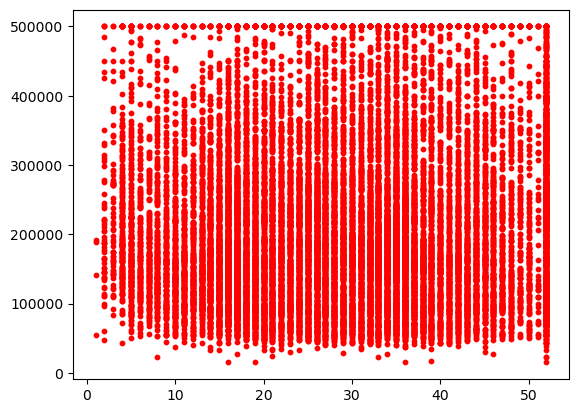

In [2]:
# Set our output 'median_house-value' as the y variable and each input as the X variable.
y = housingData['median_house_value']
X = housingData['housing_median_age']

# Create a scatterplot for each of these relations to see if the input has any correlation with the output.
plt.scatter(X, y, s=10, color="red")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

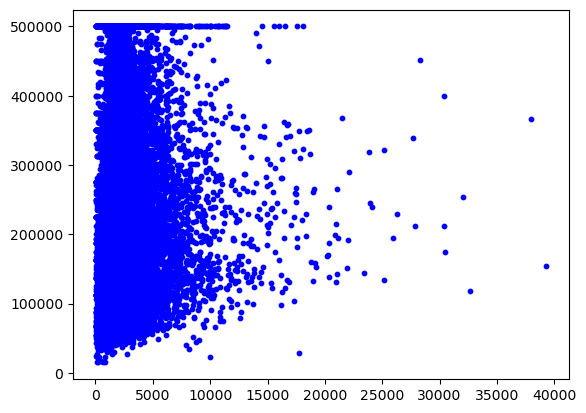

In [3]:
# Change the X value for each corresponding input to see if they have any effect on the output.
X = housingData['total_rooms']
plt.scatter(X, y, s=10, color="blue")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

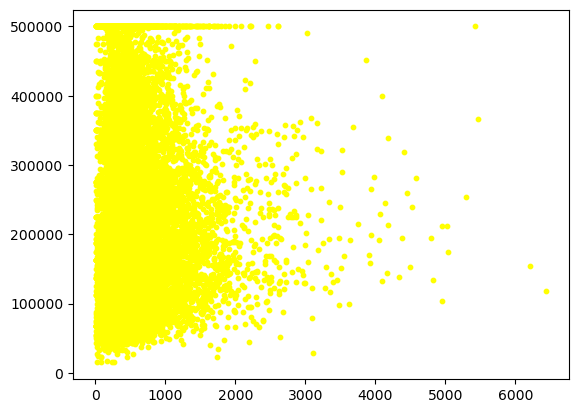

In [4]:
X = housingData['total_bedrooms']
plt.scatter(X, y, s=10, color="yellow")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

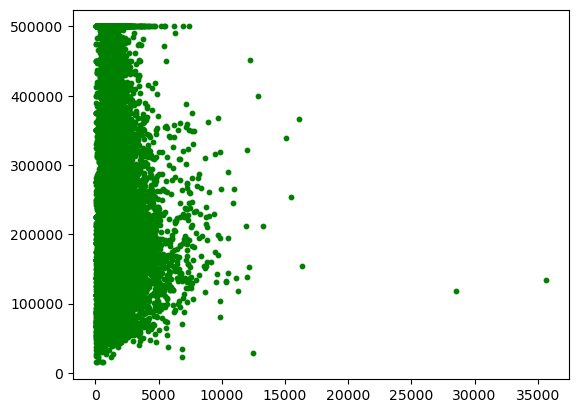

In [5]:
X = housingData['population']
plt.scatter(X, y, s=10, color="green")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

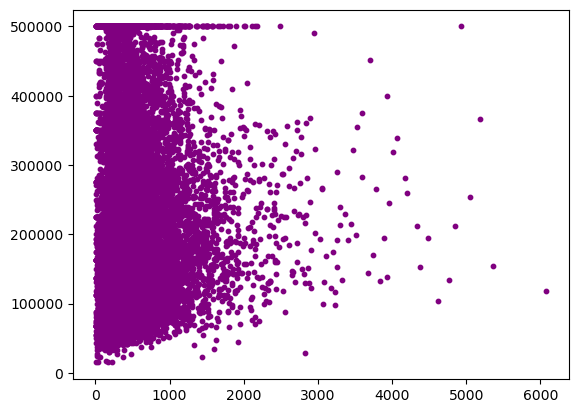

In [6]:
X = housingData['households']
plt.scatter(X, y, s=10, color="purple")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

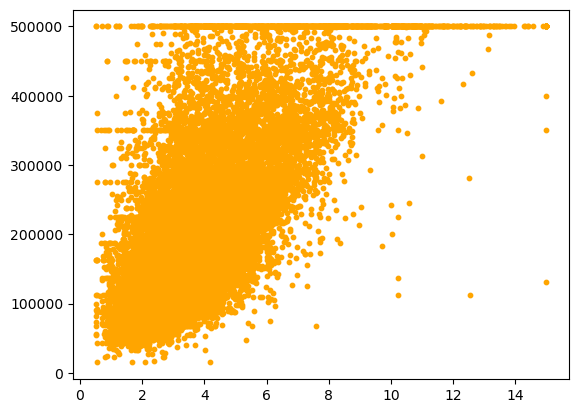

In [7]:
X = housingData['median_income']
plt.scatter(X, y, s=10, color="orange")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

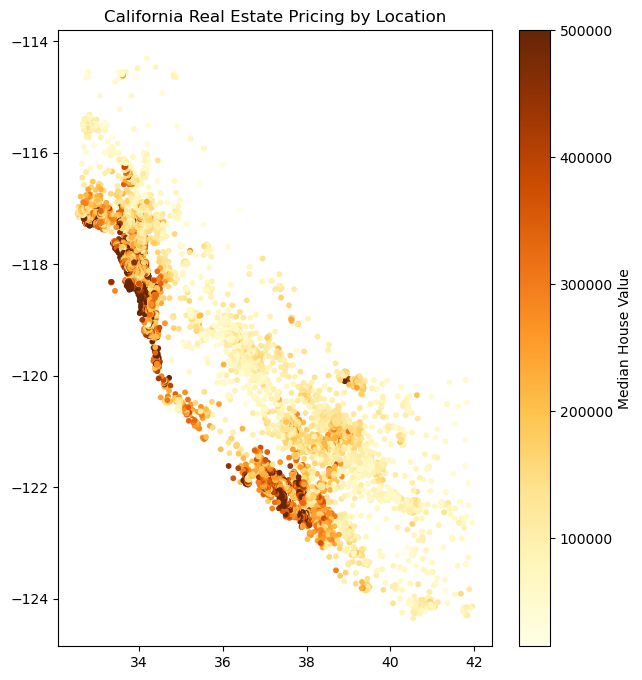

In [8]:
# We can see that the median income of a cluster has a correlation with the median house value. I want to see if the proximity to the ocean may have an effect, as owners with higher incomes may want to migrate closer to the ocean.
# In order to do this, I want to create a heatmap of housing prices in different locations.
# We can set the latitude and longitude as our x and y values of the graph to map out the different real estate cluster locations.
# Take 'median_house_value' as the z variable and color the map based on this variable.
x = housingData['latitude']
y = housingData['longitude']
z = housingData['median_house_value']

# Resize the scatterplot to better visualize the shape of the area.
# Color the map with a yellow, orange, and brown colormap and set it based on the z variable. The more expensive the homes, the darker the color.
# Set the appropriate labels and finally use plt.show() to output your plot.
plt.figure(figsize=(7, 8))
plt.scatter(x, y, s=10, c=z, cmap='YlOrBr')
plt.title('California Real Estate Pricing by Location')
cbar = plt.colorbar()
cbar.set_label('Median House Value')

plt.show

In [9]:
# Since 'ocean_proximity' clearly has an effect on the 'median_house_value' we want to convert the values into something more useful to us.
# Create a new variable string_list that will grab all the values from the 'ocean_proximity' column in our dataframe.
string_list = housingData['ocean_proximity']

# Set the mapping of integers so that 'NEAR OCEAN' equals 1, 'NEAR BAY' equals 2, so on and so forth.
mapping = {'NEAR BAY': 2, 'INLAND': 4, 'NEAR OCEAN': 1, '<1H OCEAN': 3, 'ISLAND': 5}

# Create a new array oceanProx[] that we can use to store our new list of integers that have been mapped according to the string values in the previous list.
oceanProx = [mapping[string] for string in string_list]

In [10]:
# We will now create a new dataframe newDF that will hold just the necessary information for our model.
# This function creates a new dataframe using just the oceanProx array, and median_income and median_house_value column from housingData.
newDF = pd.DataFrame({
    'ocean_proximity': oceanProx,
    'median_income': housingData['median_income'],
    'median_house_value': housingData['median_house_value']
})

# Print the new dataframe to view.
print(newDF)

       ocean_proximity  median_income  median_house_value
0                    2         8.3252            452600.0
1                    2         8.3014            358500.0
2                    2         7.2574            352100.0
3                    2         5.6431            341300.0
4                    2         3.8462            342200.0
...                ...            ...                 ...
20635                4         1.5603             78100.0
20636                4         2.5568             77100.0
20637                4         1.7000             92300.0
20638                4         1.8672             84700.0
20639                4         2.3886             89400.0

[20640 rows x 3 columns]


In [11]:
# This is where we will create our new prediction model using DecisionTreeClassifier that we imported from sklearn.
# We will use X as our input, which will be a 3D array containing the ocean proximity integers and the median income.
# We will use y as our output which will tell us median house value.
X = newDF.drop(columns=['median_house_value'])
y = newDF['median_house_value']

# The model will learn from the given data and predict a new y value output given an X value input array.
# In this case, we will use a home near the bay with a median income of $74000, and a home inland with a median income of $53000.
# As you can see it predicts the price of the homes at $287,300 and $191,700 respectively.
model = DecisionTreeClassifier()
model.fit(X.values, y)
predictions = model.predict([ [2, 7.40], [4, 5.30] ])
predictions

array([287300., 191700.])